In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [190]:
df=pd.read_csv("./data/train_data.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [191]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

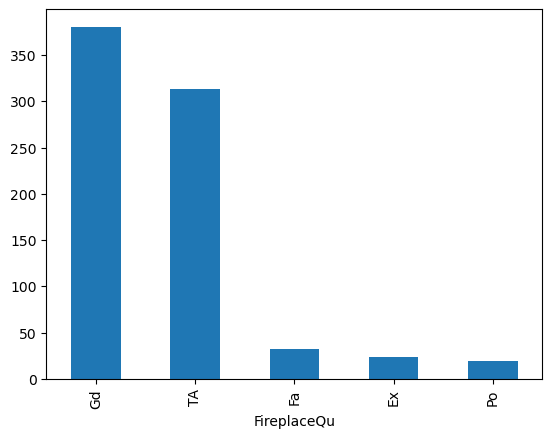

In [192]:
df['FireplaceQu'].value_counts().plot(kind='bar');

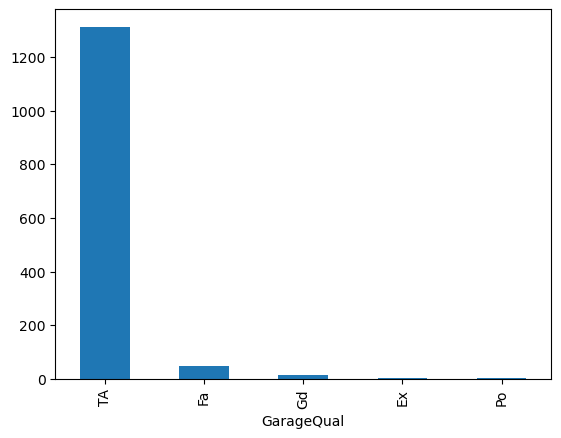

In [193]:
df['GarageQual'].value_counts().plot(kind='bar');

In [194]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

## **1. Frequent Value Imputation**

### ****(i) GarageQual****

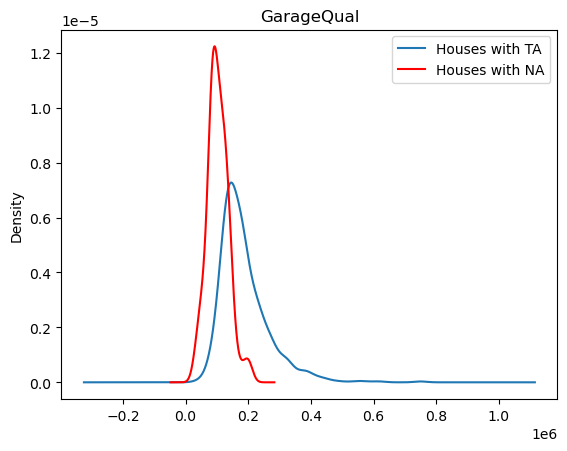

In [195]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, label='Houses with TA')

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red', label='Houses with NA')

ax.legend(loc='best')
plt.title('GarageQual')

plt.show()

<Axes: xlabel='GarageQual'>

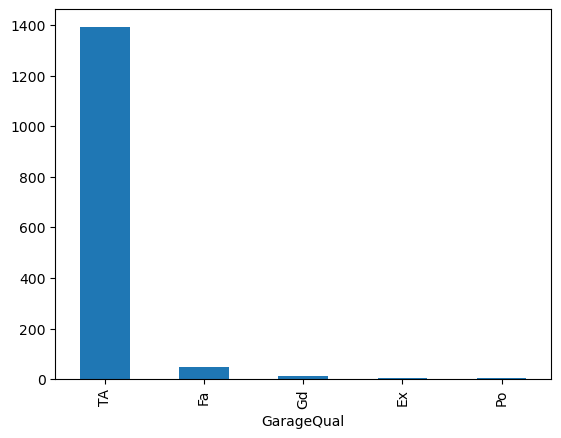

In [196]:
temp = df[df['GarageQual']=='TA']['SalePrice']

df['GarageQual'].fillna('TA', inplace=True)

df['GarageQual'].value_counts().plot(kind='bar')

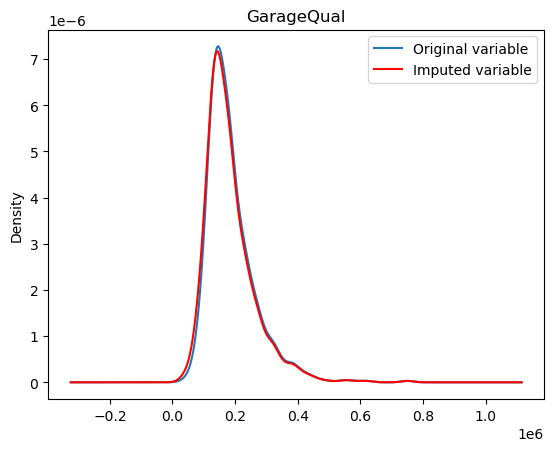

In [197]:
fig = plt.figure()
ax = fig.add_subplot(111)

# KDE plot for original variable
temp.plot(kind='kde', ax=ax, label='Original variable')

# KDE plot for imputed variable
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red', label='Imputed variable')

# Add legend
ax.legend(loc='best')

# Add title
plt.title('GarageQual');

### ****(ii) FireplaceQu****

<Axes: xlabel='FireplaceQu'>

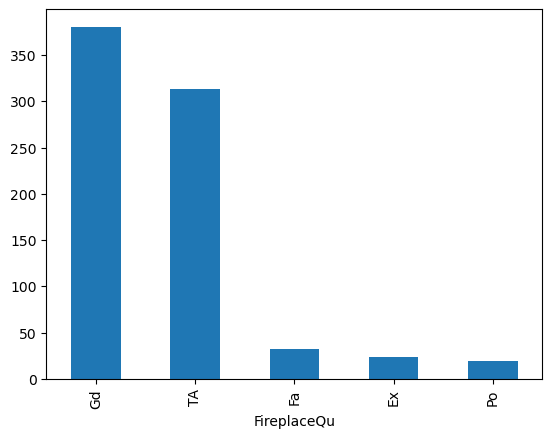

In [198]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [199]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

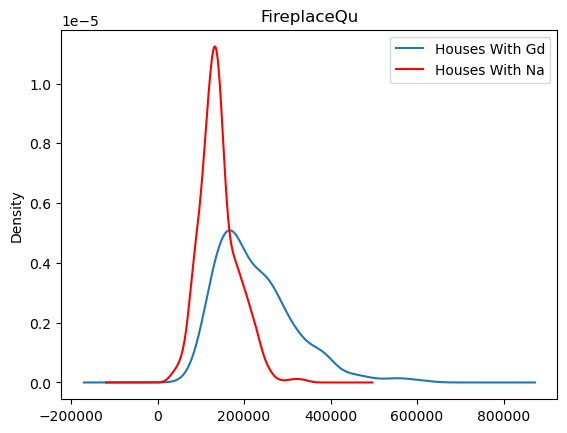

In [200]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,label='Houses With Gd')
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red',label='Houses With Na')

plt.title('FireplaceQu')
ax.legend(loc='best')


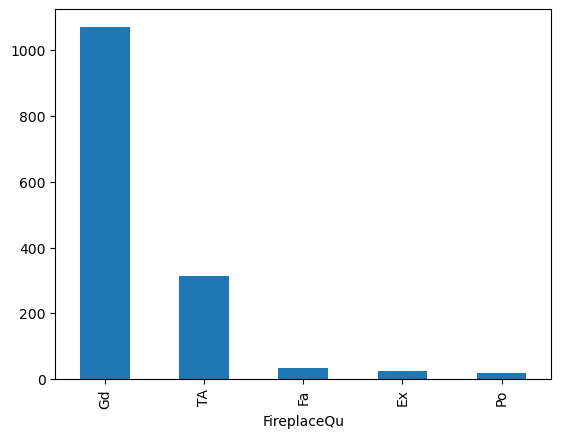

In [201]:
temp2=df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd',inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar');

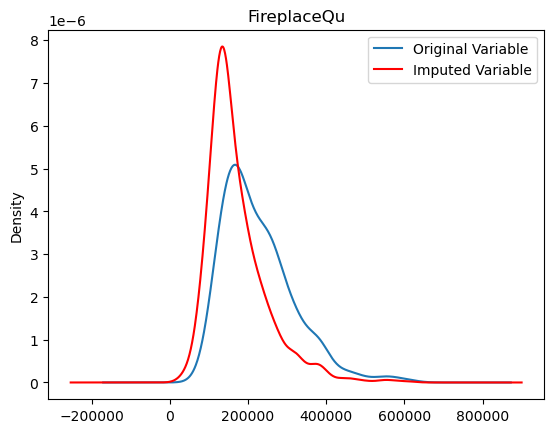

In [202]:
fig=plt.figure()
ax=fig.add_subplot(111)

# plot for original variables
temp2.plot(kind='kde',label='Original Variable',ax=ax)

# kde plot for imputed variables
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red',label='Imputed Variable')

ax.legend(loc='best')

plt.title("FireplaceQu")
plt.show()


### ****(iii) Using Sklearn****

In [203]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [205]:
imputer=SimpleImputer(strategy='most_frequent')

In [206]:
X_train=imputer.fit_transform(X_train)

X_test=imputer.transform(X_test)

In [207]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)